---

# Logistic Regression

## Introduction

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability. There are two types of logistic regression: Binary and Multi-linear functions failsClass. In this project, we will focus on the binary.

Compared to general linear regression, logistic regressio uses a more complex cist function, this cost function is defined as the "Sigmoid function" which is limited between 0 and 1.

## Algorithm

The logistic regression can be derived from **"Single Neuron Model"**:

<img src="single neuron model.png" width="500" align="center"/>

Sigmoid Activation Function: $$\phi(z)=\frac{1}{1+e^{-z}}, \quad \phi(z) \in (0,1)$$

The conditional probability function: $$p(y^{(i)}|x^{(i)})= \left\{
    \begin{aligned}
    & \hat{y^{(i)}}, \quad y^{(i)} = 1 \\
    & 1 - \hat{y^{(i)}}, \quad y^{(i)} = 0
    \end{aligned}
    \right.$$


The binary loss function:
$$
L(\mathbf{w}, b) = -\frac{1}{N} \sum_{i=1}^{N} P\Big(y^{(i)}\mid x^{(i)}\Big) = \frac{1}{N}\sum_{i=1}^{N}\Big[ -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})\Big ]
$$

The gradient of binary loss function:
$$
C(w_1, b; x^{(i)},y^{(i)}) = -y^{(i)}\log \hat{y}^{(i)} - (1-y^{(i)}) \log (1 - \hat{y}^{(i)})
$$

$$
\begin{split}
\frac{\partial C(w_1, b; x^{(i)},y^{(i)})}{\partial w_1} = (\hat{y}^{(i)} - y^{(i)}) x^{(i)}
\end{split}
$$

$$
\frac{\partial C(w_1, b; x^{(i)},y^{(i)})}{\partial b} = (\hat{y}^{(i)} - y^{(i)})
$$

The classification error: $$E_c = \frac{1}{N}\sum_{i=1}^{N}[\hat{y}^{(i)} \neq y^{(i)}]$$
where $[\hat{y}^{(i)} \neq y^{(i)}] = 1$ whenever $\hat{y}^{(i)} \neq y^{(i)}$, and zero otherwise. 

---

## Implement

### 1. The logistic single neural model with single feature input


In the following, we use "success" and "fail" classes from the dataset to implement logistic regression.

First, plotting the scatter plot of "age" and "interest".

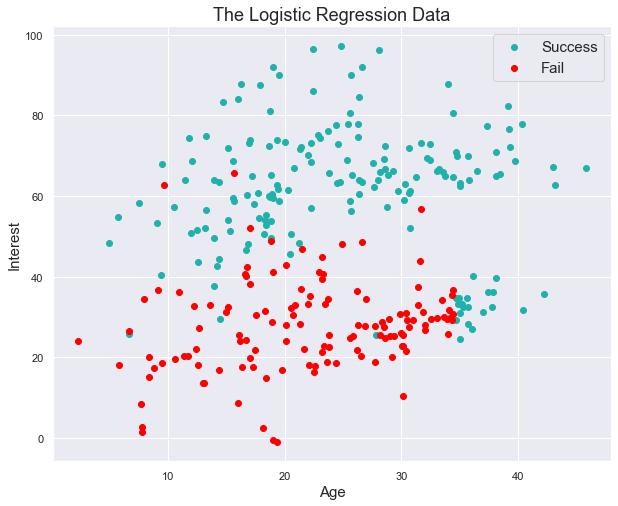

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
sns.set_theme()

df = pd.read_csv("classification.csv")
success = df[df['success'] == 1.0]
fail= df[df['success'] == 0.0]


plt.figure(figsize = (10, 8))
plt.scatter(success.age, success.interest, 
            color = "lightseagreen", label = "Success")
plt.scatter(fail.age, fail.interest, 
            color = "red", label = "Fail")         
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Interest", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("The Logistic Regression Data", fontsize = 18)
plt.show()

From the plot above, we can see it's classification data, i.e. there is no significant lienar relaionship between the data. In the following, we will focus on the relation between interest and classificaion.

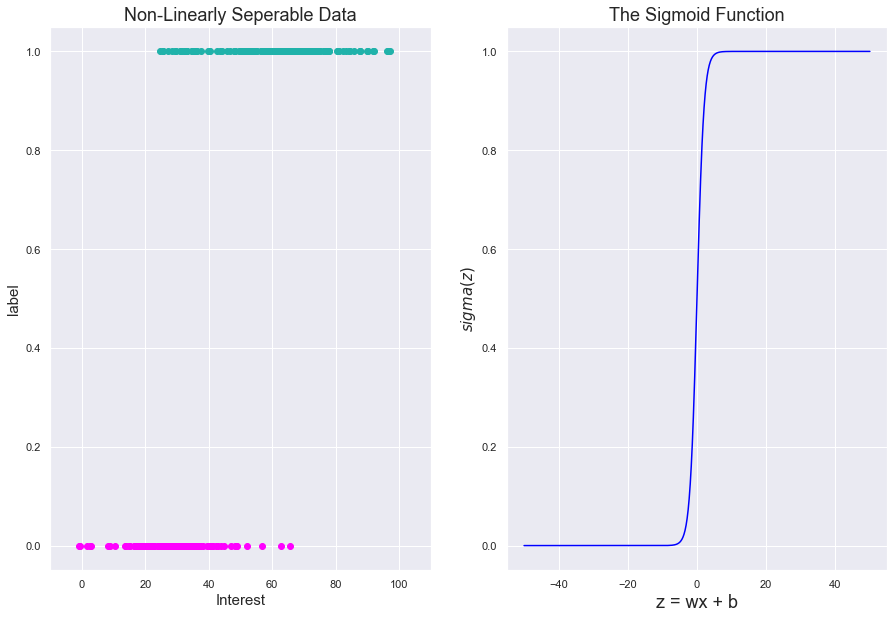

In [118]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((-10, 110))
ax1.scatter(fail.interest, 
            np.zeros(128), 
            color = "magenta", 
            label = "Fail")
ax1.scatter(success.interest, 
            np.ones(169), 
            color = "lightseagreen", 
            label = "Success")
ax1.set_xlabel("Interest", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-50.0, 50.0, 1000)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

As we can seen by the two figures above, the success value of interest may be able to map the interest measurements to the correct inputs to the sigmoid function.

Next, we will define SingleNeuron to test our guess.

In [129]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

Training the data.

In [139]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df.interest.values
X = X.reshape(-1, 1)
y = np.where(df.success == 0.0, 0, 1)

node.train(X, y, alpha = 0.001, epochs = 10_000)

/var/folders/qw/tpxkzwh515nbq0dlw8mj45r80000gn/T/ipykernel_5587/1486949480.py:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
/var/folders/qw/tpxkzwh515nbq0dlw8mj45r80000gn/T/ipykernel_5587/1486949480.py:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


There are some invide value calculated for the return function of cross_entropy_loss function, which causes some value missing in the cost function plot in the following.

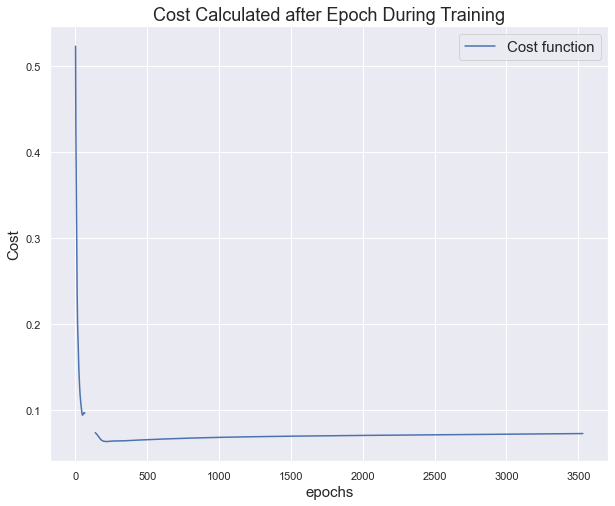

In [137]:
node.plot_cost_function()
plt.show()

As the cost function plot shown, the neuron is indeed learning over time. It looks great!

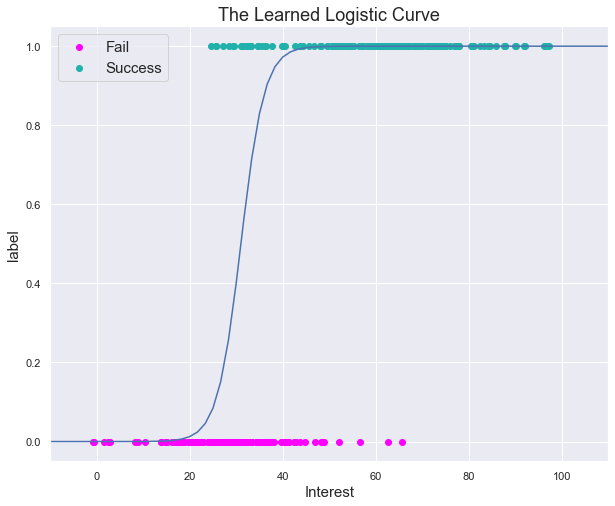

In [138]:
plt.figure(figsize = (10, 8))
plt.xlim((-10, 110 ))
plt.scatter(fail.interest, 
            np.zeros(128), 
            color = "magenta", 
            label = "Fail")
plt.scatter(success.interest, 
            np.ones(169), 
            color = "lightseagreen", 
            label = "Success")

domain = np.linspace(-15, 150, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Interest", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

The trained sigmoid function looks also great!

Next, we show the predicting value and calculate the classification error.

In [140]:
node.predict(X)

array([2.26829900e-02, 1.95273385e-02, 1.25489107e-01, 6.99635340e-02,
       1.59518202e-02, 3.68250121e-02, 9.96375084e-01, 9.78187103e-01,
       1.92085860e-01, 9.58112190e-01, 9.81649716e-01, 5.67057540e-01,
       2.57624459e-02, 9.99848787e-01, 3.20884035e-01, 9.68987885e-01,
       9.88625315e-01, 4.20904669e-02, 3.17908639e-01, 2.13203176e-01,
       6.53938207e-02, 9.96172034e-01, 9.99930844e-01, 2.92600605e-01,
       9.43682752e-01, 9.86992234e-01, 2.13426388e-02, 3.81209444e-02,
       9.95207540e-01, 9.92492985e-01, 9.95570188e-01, 1.87088302e-02,
       9.64406347e-01, 9.99678009e-01, 1.76799638e-01, 1.98012159e-01,
       9.87630303e-01, 9.77912441e-01, 1.98599979e-02, 9.92162474e-01,
       9.91848946e-01, 9.74042760e-01, 2.05515773e-01, 1.63232123e-01,
       9.52031223e-01, 9.76876232e-01, 9.95141467e-01, 1.00728801e-01,
       4.70692447e-01, 6.21016699e-01, 9.82022388e-01, 3.33436778e-01,
       1.06603660e-01, 9.77441915e-01, 9.67527938e-01, 5.89477660e-01,
      

In [143]:
np.rint(node.predict(X)) != y
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.13131313131313133


The classification error is 0.13131313131313133, which is small, that proves our trained model is good.

Now, we can view our decision boundary implied by the trained weights and bias by running the following code in the cell below.

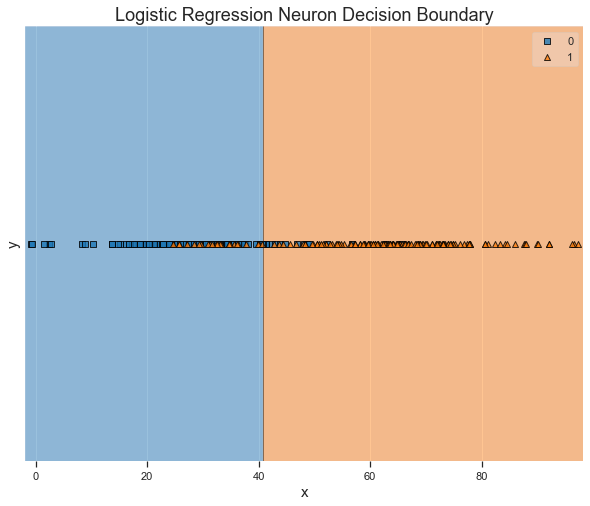

In [142]:
node.plot_decision_boundary(X, y)
plt.show()

---

### 2. The logistic single neural model with multiple feature inputs

Compared to single feature inputs, the only difference of the multiple is the amount of inputs, i.e the amount of weight will increase. The detail shows in the following figure.


<img src="multi_logistic_neuron.png" width="500" align="center"/>

Next, let's instantiate a "SingleNeuron" model with age and interest measurements as input, train this model with the same learning rate and number of epochs as the variable "node", and then compare the cost function over epochs between the two models. 

/var/folders/qw/tpxkzwh515nbq0dlw8mj45r80000gn/T/ipykernel_5587/1486949480.py:2: RuntimeWarning: divide by zero encountered in log
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)
/var/folders/qw/tpxkzwh515nbq0dlw8mj45r80000gn/T/ipykernel_5587/1486949480.py:2: RuntimeWarning: invalid value encountered in multiply
  return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)


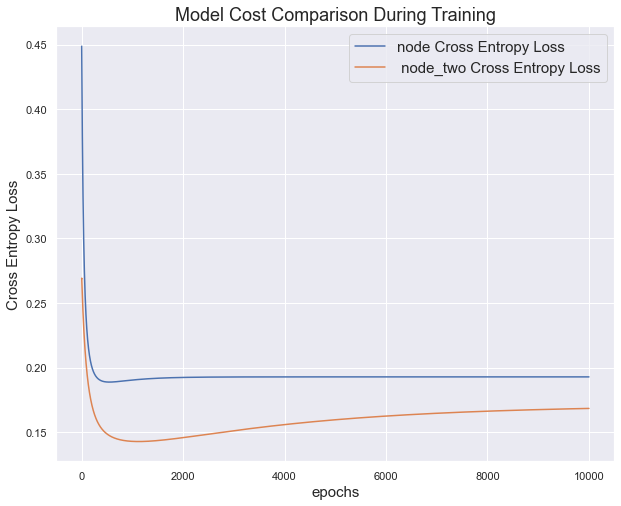

In [144]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df[["age", "interest"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.001, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

As we can see by the figures generated above, using two features results in a lower cost function (in this particular instance) with the same learning rate and number of epochs. 

Next, we plot the boundary figure of two class features model.

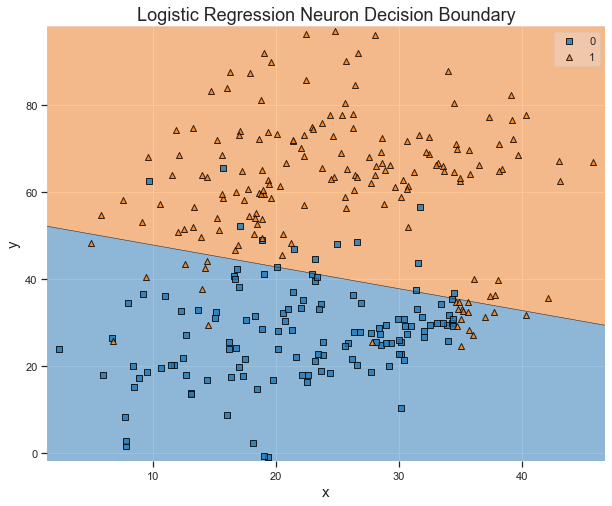

In [145]:
node_two.plot_decision_boundary(X_two, y)

Let's calculate the classification error of two features.

In [148]:
classification_error_two = (np.rint(node_two.predict(X_two))) != y.astype(int)
print(f"Classification Error = {sum(classification_error_two)/ len(y)}")

Classification Error = 0.12457912457912458


The classification error is 0.12457912457912458 which is smaller than the model with one feature, we can also see this result from the cross entropy cost plot above. It also means the model with two features fits better.